<a href="https://colab.research.google.com/github/swndiramgu/github_week3/blob/main/Animals_Classification_Using_Decisiontree_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd

In [2]:
data = pd.read_csv('/content/vertebrate.csv')

In [3]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [4]:
data['Class'] = data['Class'].replace(['reptiles', 'fishes', 'amphibians', 'birds'], 'Non-mammals')

In [5]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,Non-mammals
2,salmon,0,0,1,0,0,0,Non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,Non-mammals
5,komodo,0,0,0,0,1,0,Non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,Non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,Non-mammals


In [6]:
pd.crosstab([data['Warm-blooded'], data['Gives Birth']], data['Class'])

Class                     Non-mammals  mammals
Warm-blooded Gives Birth                      
0            0                      7        0
             1                      1        0
1            0                      2        0
             1                      0        5

In [7]:
from sklearn import tree

In [8]:
y = data['Class']

In [9]:
y

0         mammals
1     Non-mammals
2     Non-mammals
3         mammals
4     Non-mammals
5     Non-mammals
6         mammals
7     Non-mammals
8         mammals
9     Non-mammals
10    Non-mammals
11    Non-mammals
12        mammals
13    Non-mammals
14    Non-mammals
Name: Class, dtype: object

In [10]:
X = data.drop(['Name', 'Class'], axis=1)

In [11]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [13]:
clf # inititialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
clf = clf.fit(X, y)

In [15]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
import pydotplus

In [17]:
from IPython.display import Image

In [18]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals', 'non-mammals'], filled=True, out_file=None)

#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

In [19]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [10, 5]\\nclass = mammals", fillcolor="#f2c09c"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [9, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [1, 5]\\nclass = non-mammals", fillcolor="#61b1ea"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [0, 5]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 4 ;\n}'

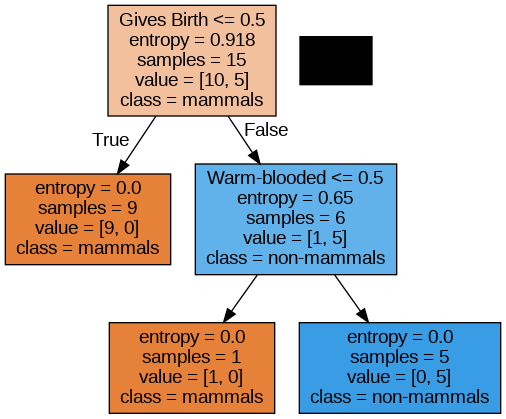

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [21]:
testData =[['gila monister', 0, 0, 0, 0, 1, 1, 'non mammals'],
           ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
           ['owl', 1, 0, 0, 1, 1, 0, 'non mammals'],
           ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [22]:
testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [23]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [24]:
testData = pd.DataFrame(testData, columns=data.columns)

In [25]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non mammals
3,dolphin,1,1,1,0,0,0,mammals


In [26]:
testY = testData['Class']

In [27]:
testY

0    non mammals
1        mammals
2    non mammals
3        mammals
Name: Class, dtype: object

In [28]:
testX = testData.drop(['Name', 'Class'], axis=1)

In [29]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [30]:
predY = clf.predict(testX)

In [31]:
testY

0    non mammals
1        mammals
2    non mammals
3        mammals
Name: Class, dtype: object

In [32]:
predY

array(['Non-mammals', 'Non-mammals', 'Non-mammals', 'mammals'],
      dtype=object)

In [33]:
predictions= pd.concat([testData['Name'], testData['Class'], pd.Series(predY, name='Predcted Class')], axis=1)

In [34]:
predictions

,Name,Class,Predcted Class
0,gila monister,non mammals,Non-mammals
1,platypus,mammals,Non-mammals
2,owl,non mammals,Non-mammals
3,dolphin,mammals,mammals


In [35]:
3/4*100

75.0

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(testY, predY)

0.25

In [38]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.25


REPEATING THE SAME WITH THE ANIMALS DATASET GENERATED WITH DTREE.EXE


In [39]:
import pandas as pd

In [40]:
data = pd.read_csv('/content/animals.csv')

In [41]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [42]:
data['Class'] = data['Class'].replace(['Eggs', 'Aquatic', 'Predator', 'Backbone'], 'Venemous')

In [43]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [44]:
pd.crosstab([data[' Milk'], data[' Airborne']], data['Class'])

Class             1   2  3   4  5  6  7
 Milk  Airborne                        
0     0           0   4  3  12  4  2  9
      1           0  14  0   0  0  5  0
1     0          36   0  0   0  0  0  0
      1           1   0  0   0  0  0  0

In [45]:
print(data.columns)

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')


In [46]:
print([col for col in data.columns])


['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic', ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins', ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class']


In [47]:
from sklearn import tree

In [48]:
y = data['Class']

In [49]:
y

0     1
1     1
2     4
3     1
4     1
     ..
85    7
86    4
87    2
88    6
89    5
Name: Class, Length: 90, dtype: int64

In [50]:
X = data.drop([' Aquatic', 'Class'], axis=1)

In [51]:
X

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,1,0,0,1,0,1,1,1,1,0,0,4,0,0,1
1,2,1,0,0,1,0,0,1,1,1,0,0,4,1,0,1
2,3,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0
3,4,1,0,0,1,0,1,1,1,1,0,0,4,0,0,1
4,5,1,0,0,1,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,0,0,0,0,0,5,0,0,0
86,87,0,0,1,0,0,1,1,1,0,1,1,0,1,0,1
87,88,0,1,1,0,1,0,0,1,1,0,0,2,1,0,1
88,89,0,0,1,0,0,0,0,0,1,0,0,6,0,0,0


In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [53]:
clf # inititialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
clf = clf.fit(X, y)

In [55]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [56]:
import pydotplus

In [57]:
from IPython.display import Image

In [58]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1', '2', '3', '4', '5', '6', '7'], filled=True, out_file=None)

#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

In [59]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]\\nclass = 1", fillcolor="#f8decb"] ;\n1 [label=" Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]\\nclass = 2", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=" Feathers <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]\\nclass = 2", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]\\nclass = 7", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]\\nclass = 2", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label=" Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]\\nclass = 4", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\

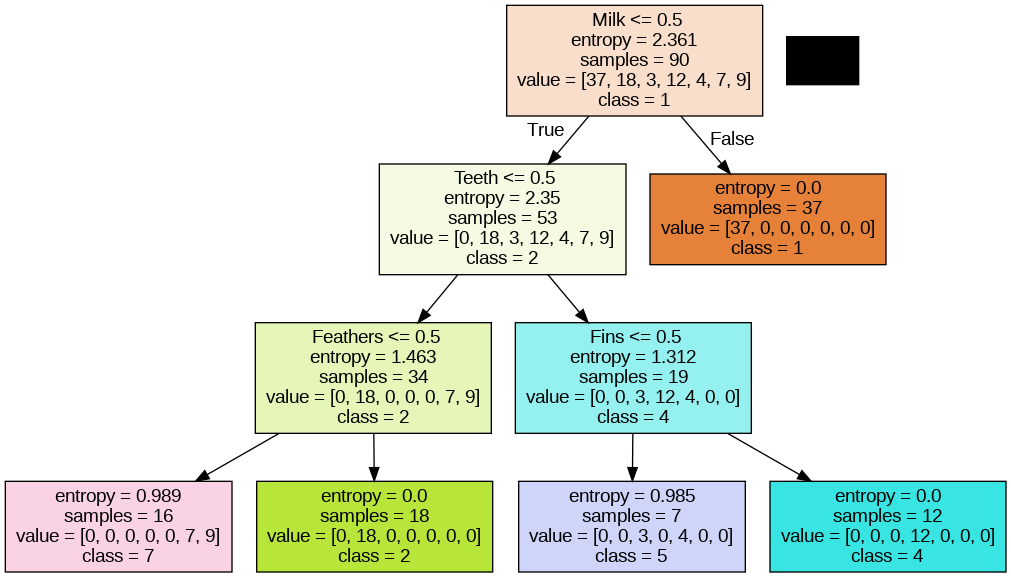

In [60]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [61]:
testData =[[91, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 7],
           [92, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 5],
           [93, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 4],
           [94, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3]]


In [62]:
testData

[[91, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 7],
 [92, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 5],
 [93, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 4],
 [94, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3]]

In [63]:
data.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')

In [64]:
testData = pd.DataFrame(testData, columns=data.columns)

In [65]:
testData

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,91,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,7
1,92,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,5
2,93,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,4
3,94,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,3


In [66]:
testY = testData['Class']

In [67]:
testY

0    7
1    5
2    4
3    3
Name: Class, dtype: int64

In [68]:
testX = testData.drop(['Class'], axis=1)

In [69]:
testX

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,91,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1
1,92,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1
2,93,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1
3,94,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1


In [70]:
missing_columns = set(clf.feature_names_in_) - set(testX.columns)
extra_columns = set(testX.columns) - set(clf.feature_names_in_)

print("Missing columns in testX:", missing_columns)
print("Extra columns in testX:", extra_columns)

# Ensuring that the columns are in the same order
print("Columns in trainX:", clf.feature_names_in_)
print("Columns in testX:", testX.columns)


Missing columns in testX: set()
Extra columns in testX: {' Aquatic'}
Columns in trainX: ['Sr' ' Hair' ' Feathers' ' Eggs' ' Milk' ' Airborne' ' Predator' ' Teeth'
 ' Backbone' ' Breathes' ' Venemous' ' Fins' ' Legs' ' Tails' ' Domestic'
 ' Catsize']
Columns in testX: Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize'],
      dtype='object')


In [71]:
#Aligning testX columns with trainX
testX_aligned = testX[clf.feature_names_in_]

# making the the prediction
predY = clf.predict(testX_aligned)


In [72]:
testY

0    7
1    5
2    4
3    3
Name: Class, dtype: int64

In [73]:
predY

array([5, 1, 5, 5])

In [74]:
predictions= pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name='Predcted Class')], axis=1)

In [75]:
predictions

,Sr,Class,Predcted Class
0,91,7,5
1,92,5,1
2,93,4,5
3,94,3,5


In [76]:
3/4*100

75.0

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(testY, predY)

0.0

In [79]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.00
